# IV. HÁZI FELADAT

Ezt a feladatsort tetszőleges nyelven meg lehet oldani. A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

In [1]:
%pylab inline
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Időbeli folyamatok korrelációjának vizsgálata

Időbeli folyamatok vizsgálatakor érdekes kérdés, hogy két változó "mennyire egyszerre" változik, illetve a változások milyen időbeli eltolással követik egymást. Jelöljön $f(t)$ és $g(t)$ két folytonos, de időben diszkréten és véges módon mintavételezett folyamatot. A két folyamat [keresztkorrelációs függvényét](https://en.wikipedia.org/wiki/Cross-correlation), mely a $\tau$ _időeltolás_ függvényében adja meg, hogy a két folyamat mennyire egyszerre változik, a következő módon definiálhatjuk:

$$
R_{fg}(\tau) = \sum_t f(t) \, g(t + \tau) = \sum_t f(t - \tau) \, g(t)
$$

Az egyes folyamatok várható értékét levonva, valamint a szórásokkal normálva a [keresztkovariancia](https://en.wikipedia.org/wiki/Cross-correlation)-függvényhez jutunk:

$$
K_{fg}(\tau) = \frac{1}{\sigma_1 \sigma_2} \sum_t \left[ f(t) - \mu_f \right] \left[ g(t + \tau) - \mu_g \right]
$$

Belátható, hogy ha a folyamatokat csak egy időben véges intervallumon ismerjük, akkor a korrelációs függvényt csak egy véges hosszúságú $\tau < \tau_{\mathrm{max}}$ időablakkal érdemes meghatározni. A keresztkorrelációs függvény maximumának megkeresésével megtalálhatjuk azt az időeltolást, amely mellett a két időbeli folyamat a leginkább korrellál.

Amennyiben egy időbeli folyamat korrelációját nem egy másik folyamathoz, hanem saját magához képest vizsgáljuk, úgyhogy keresztkorreláció helyett [autokorrelációról](https://en.wikipedia.org/wiki/Autocorrelation) beszélünk. Belátható, hogy az autokorrelációs függvény páros, illetve hogy periodikus jelek autokorrelációja periodikus. Nem periodikus jelek esetében az autokorrelációs függvény $\tau = 0$-tól távolodva lecsengő. A lecsengés üteme függ a vizsgált folyamatoktól. Véletlenszerű zajok és kaotikusan viselkedő rendszerek esetében a lecsengés exponenciálisan gyors, de előfordulnak olyan folyamatok is, ahol a korrelációk csak hatványfüggvény szerint csengenek le.

A kereszkorrelációs függvényhez nagyon hasonló módon definiáljuk diszkréten mintavételezett jelek [konvolúcióját](https://en.wikipedia.org/wiki/Convolution):

$$
f(t) \star g(t) = \sum_\tau f(t) \, g(t - \tau)
$$

Lineáris rendszerek esetében korábban már láttuk, hogy a konvolúció művelete segítségével igen könnyen meghatározható a rendszer válasza, ha a [Green-függvény](https://en.wikipedia.org/wiki/Green%27s_function) (impulzusválasz) ismert. A konvolúció művelet Fourier-térben szorzásnak felel meg:

$$
(f \star g)(\omega) = f(\omega) g(\omega)
$$

Az autokorrelációs függvény szintén érdekes kapcsolatban áll a Fourier-transzformációval. A [Wiener-Hincsin-tétel](https://en.wikipedia.org/wiki/Wiener–Khinchin_theorem) kimondja, hogy egy függvény autokorrelációs függvényének Fourier-transzformáltja megegyezik a függvény teljesítményspektrumával, azaz Fourier-transzformáltjának abszolút érték négyzetével:

$$
R_{ff}(\omega) = \left| f(\omega) \right|^2
$$

# Feladatok

## 1. feladat - Korreláció, konvolúció

a) Írjunk olyan függvényeket, melyek a következő jelalakokat valósítják meg:

* egyetlen $T$ szélességű, $A$ amplitúdójú négyszögimpulzus (boxcar)
* egyetlen $T$ szélességű, $A$ amplitúdójú egyenlő szárú háromszögimpulzus
* egyetlen $T$ szélességű, $A$ amplitúdójú merőleges szárú háromszögimpulzus
* $T$ periódusidejú, $A$ amplitúdójú négyszögjel

Rajzoljuk fel a jeleket egy megfelelően mintavételezett időtartományon, majd határozzuk meg:

b) a jelek autokorrelációját

c) keresztkorrelációját

d) különböző jelek egymással vett konvolúcióját

A feladat megvalósításához használjuk a `numpy.correlate` és `numpy.convolve` függvényeket.

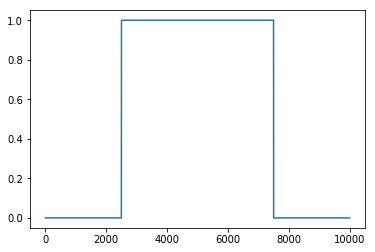

In [2]:
def myboxcar(T, symm = False):
    def f(t):
        return np.int0((-T/2  <= t) & (t < T/2)) if symm else np.int0((2500 <= t) & (t < T))
    return f
bc = myboxcar(7500)
t_ = linspace(0, 10000, 10001)
plot(t_, bc(t_))
#plt.plot(t_, myboxcar2(t_, 10), '.')

In [104]:
def square_func(t):
    if int(2*t)%2 == 0:
        return 1
    else:
        return -1

t_samples = numpy.linspace(0.0,1.0,1000)

samples = [square_func(i) for i in t_samples]

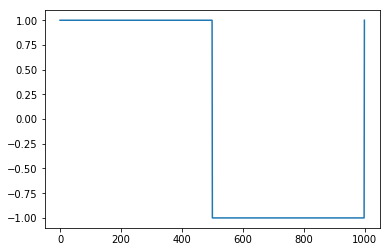

In [105]:
plot(samples)

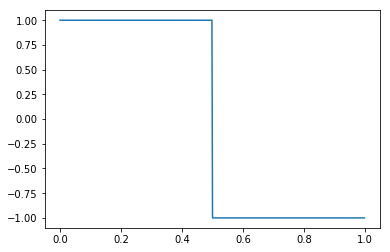

In [113]:
t = np.linspace(0, 1, 500, endpoint=False)
sig = np.sin(2 * np.pi * t)
pwm = signal.square(2 * np.pi * 1* t)
plot(t,pwm)

In [142]:
# feladat megoldása
# T = 1000

def Nszög(f = 1,t = np.linspace(0, 1, 7001, endpoint=False)): # 
    # Plot the square wave signal
    zero = np.zeros(1500)
    sig_N = signal.square(2 * np.pi * f* t)
    return np.r_[zero, sig_N,zero]
########
def triangle(length=12001, amplitude=1):
    section = length // 4
    x = np.linspace(0, amplitude, section+1)
    mx = -x
    zero = np.zeros(2000)
    return np.r_[zero, x, x[-2::-1],zero]
########
def sawtooth(length=17001, amplitude=1):
    section = length // 4
    x = np.linspace(0, amplitude, section+1)
    mx = -x
    zero = np.zeros(2900)
    return np.r_[zero, x,zero]
########
def boxcar(T = 10, symm = True,t = linspace(0, 10, 10001)):
    def f(t):
        return int0((- T/2  <= t) & (t < T/2)) if symm else int0((0 <= t) & (t < T))



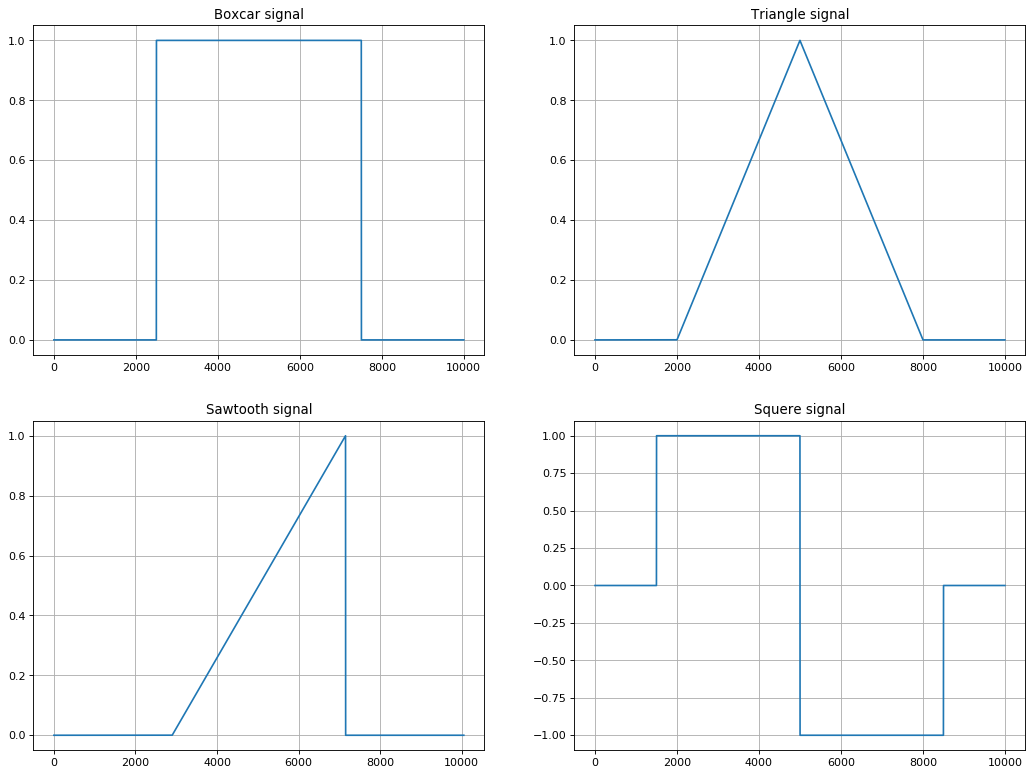

In [143]:
a = zeros(50)
#concatenate([x, y, z])
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='r')  
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

subplot(2, 2, 1)
title ("Boxcar signal")
plot(t_, bc(t_))
grid(True)



subplot(2, 2, 2)
title("Triangle signal")
plot(triangle())
grid(True)


subplot(2, 2, 3)
title("Sawtooth signal")
plot(sawtooth())
grid(True)

subplot(2, 2, 4)
title("Squere signal")
plot(Nszög()) # Négyszögjel
grid(True)

# Autokorreláció

In [144]:
sawtooth_corr_same = numpy.correlate(1+sawtooth(),1+sawtooth(),"same")
sawtooth_corr_same = sawtooth_corr_same[sawtooth_corr_same.size//2:]
sawtooth_corr_full = numpy.correlate(1+sawtooth(),1+sawtooth(),"full")
sawtooth_corr_full = sawtooth_corr_full[sawtooth_corr_full.size//2:]
#sawtooth_corr_valid = numpy.correlate(sawtooth(),sawtooth(T=1000,t=linspace(100,101,1000)),"valid")

sqer_corr_same = numpy.correlate(Nszög(),Nszög(),"same")
sqer_corr_same = sqer_corr_same[sqer_corr_same.size//2:]
sqer_corr_full = numpy.correlate(Nszög(),Nszög(),"full")
sqer_corr_full = sqer_corr_full[sqer_corr_full.size//2:]
#sqer_corr_valid = numpy.correlate(Nszög(),Nszög(A = 1,f = 1,t = linspace(500, 1500, 1000)),"valid")

tri_corr_same = numpy.correlate(triangle(),triangle(),"same")
tri_corr_same = tri_corr_same[tri_corr_same.size//2:]
tri_corr_full = numpy.correlate(triangle(),triangle(),"full")
tri_corr_full = tri_corr_full[tri_corr_full.size//2:]
#tri_corr_valid = numpy.correlate(triangle(),triangle(T=0.5,t = linspace(0.5, 1.5, 1000)),"valid")

box_corr_same = numpy.correlate(bct,bct,"same")
box_corr_same = box_corr_same[box_corr_same.size//2:]
box_corr_full = numpy.correlate(bct,bct,"full")
box_corr_full = box_corr_full[box_corr_full.size//2:]
#box_corr_valid =correlate(boxcar()[0:1000],boxcar()[500:1500],"valid")


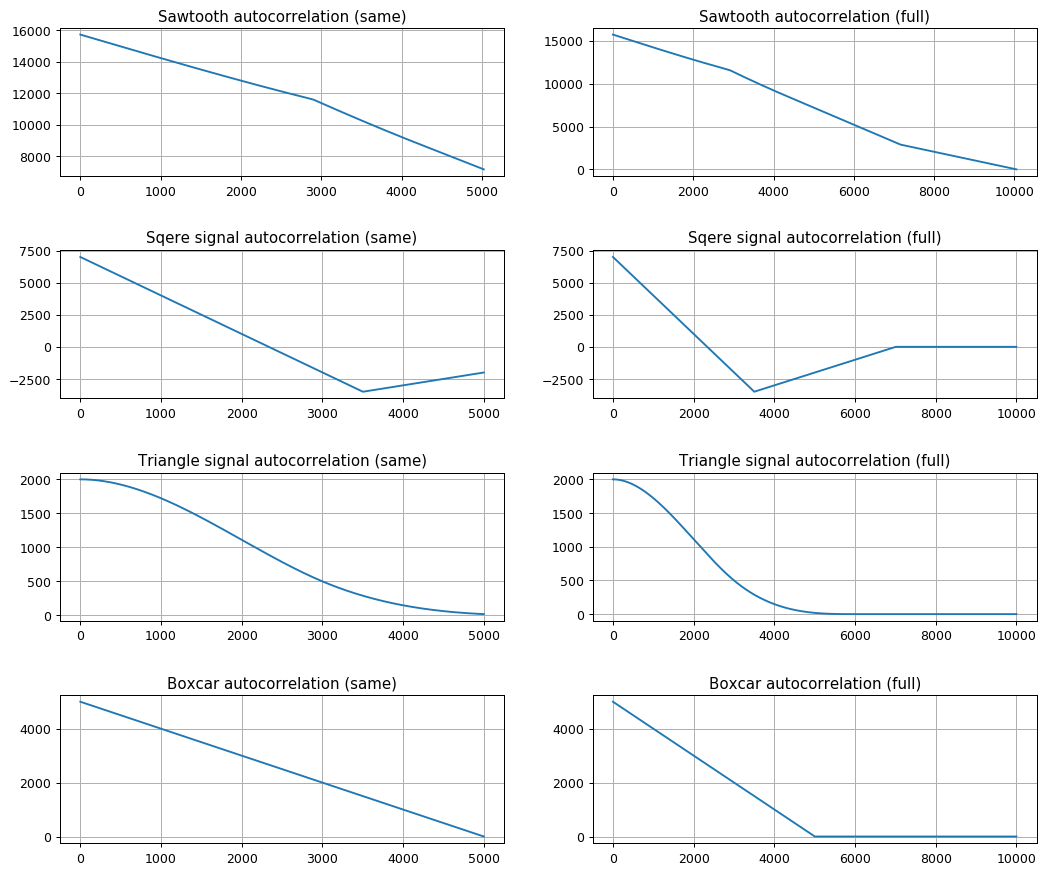

In [145]:
figure(num=None, figsize=(14, 12), dpi=90, facecolor='w', edgecolor='r')  
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

subplot(4, 2, 1)
title ("Sawtooth autocorrelation (same)")
plot(sawtooth_corr_same)
grid(True)


subplot(4, 2, 2)
title("Sawtooth autocorrelation (full)")
plot(sawtooth_corr_full)
grid(True)


#subplot(4, 3, 3)
#title("Sawtooth autocorrelation (valid)")
#plot(sawtooth_corr_valid)
#grid(True)

subplot(4, 2, 3)
title("Sqere signal autocorrelation (same)")
plot(sqer_corr_same)
grid(True)


subplot(4, 2, 4)
title("Sqere signal autocorrelation (full)")
plot(sqer_corr_full)
grid(True)


#subplot(4, 3, 6)
#title("Sqere signal autocorrelation (valid)")
#plot(sqer_corr_valid)
#grid(True)


subplot(4, 2, 5)
title ("Triangle signal autocorrelation (same)")
plot(tri_corr_same)
grid(True)



subplot(4, 2, 6)
title("Triangle signal autocorrelation (full)")
plot(tri_corr_full)
grid(True)


#subplot(4, 3, 9)
#title("Triangle signal autocorrelation (valid)")
#plot(tri_corr_valid)
#grid(True)

subplot(4, 2, 7)
title("Boxcar autocorrelation (same)")
plot(box_corr_same)
grid(True)


subplot(4, 2, 8)
title("Boxcar autocorrelation (full)")
plot(box_corr_full)
grid(True)


#subplot(4, 3,12)
#title("Boxcar autocorrelation (valid)")
#plot(box_corr_valid)
#grid(True)

# Kereszt korreláció

In [146]:
st_N_xcorr_same = numpy.correlate(sawtooth(),Nszög(),"same")
st_N_xcorr_same = st_N_xcorr_same[st_N_xcorr_same.size//2:]
st_N_xcorr_full = numpy.correlate(sawtooth(),Nszög(),"full")
st_N_xcorr_full = st_N_xcorr_full[st_N_xcorr_full.size//2:]
#st_N_xcorr_valid = numpy.correlate(sawtooth(),Nszög(A = 1,f = 1,t = linspace(500, 1500, 1000)),"valid")

st_tri_xcorr_same = numpy.correlate(sawtooth(),triangle(),"same")
st_tri_xcorr_same = st_N_xcorr_full[st_N_xcorr_full.size//2:]
st_tri_xcorr_full = numpy.correlate(sawtooth(),triangle(),"full")
st_tri_xcorr_full = st_N_xcorr_full[st_N_xcorr_full.size//2:]
#st_tri_xcorr_valid = numpy.correlate(sawtooth(),triangle(T=0.5,t = linspace(0.5, 1.5, 1000)),"valid")

st_box_xcorr_same = numpy.correlate(sawtooth(),bct,"same")
st_box_xcorr_same = st_box_xcorr_same[st_box_xcorr_same.size//2:]
st_box_xcorr_full = numpy.correlate(sawtooth(),bct,"full")
st_box_xcorr_full = st_box_xcorr_full[st_box_xcorr_full.size//2:]
#st_box_xcorr_valid = numpy.correlate(sawtooth(),boxcar()[500:1500],"valid")

sqer_tri_xcorr_same = numpy.correlate(Nszög(),triangle(),"same")
sqer_tri_xcorr_same = sqer_tri_xcorr_same[sqer_tri_xcorr_same.size//2:]
sqer_tri_xcorr_full = numpy.correlate(Nszög(),triangle(),"full")
sqer_tri_xcorr_full = sqer_tri_xcorr_full[sqer_tri_xcorr_full.size//2:]
#sqer_tri_xcorr_valid = numpy.correlate(Nszög(),triangle(T=0.5,t = linspace(0.5, 1.5, 1000)),"valid")

sqer_box_xcorr_same = numpy.correlate(Nszög(),bct,"same")
sqer_box_xcorr_same = sqer_box_xcorr_same[sqer_box_xcorr_same.size//2:]
sqer_box_xcorr_full = numpy.correlate(Nszög(),bct,"full")
sqer_box_xcorr_full = sqer_box_xcorr_full[sqer_box_xcorr_full.size//2:]
#sqer_box_xcorr_valid = numpy.correlate(Nszög(),boxcar()[500:1500],"valid")

tri_box_xcorr_same = numpy.correlate(triangle(),bct,"same")
tri_box_xcorr_same = tri_box_xcorr_same[tri_box_xcorr_same.size//2:]
tri_box_xcorr_full = numpy.correlate(triangle(),bct,"full")
tri_box_xcorr_full = tri_box_xcorr_full[tri_box_xcorr_full.size//2:]
#tri_box_xcorr_valid = numpy.correlate(triangle(),boxcar()[500:1500],"valid")

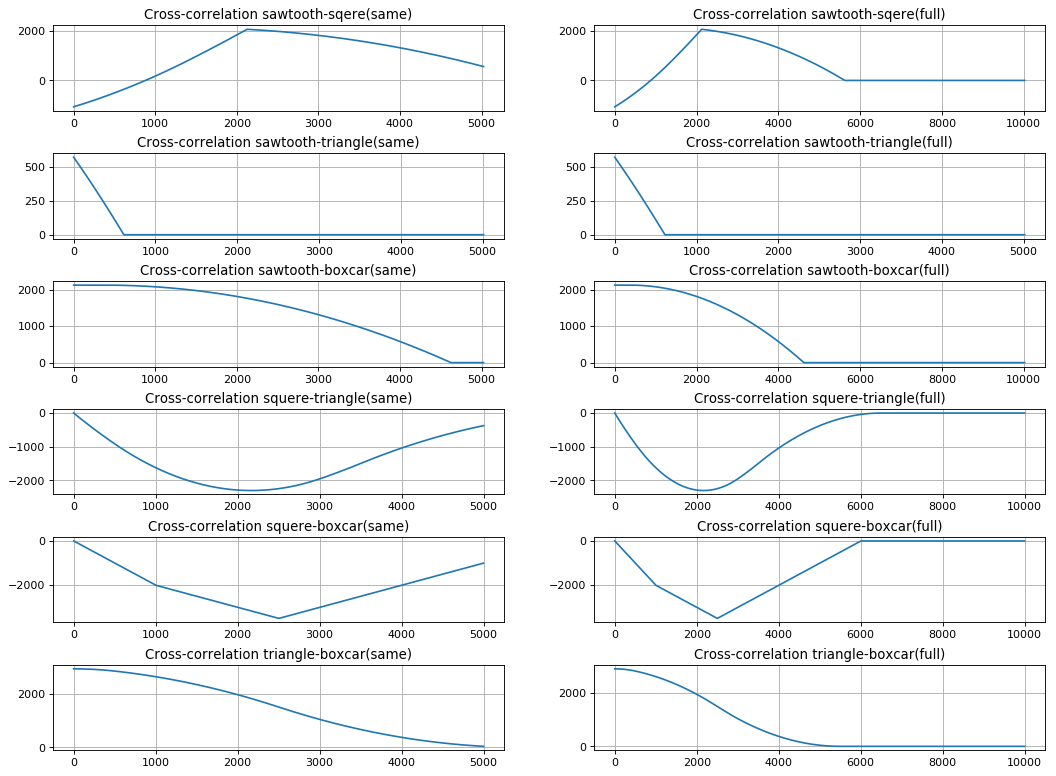

In [147]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='r')  
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

subplot(6,2,1)
title("Cross-correlation sawtooth-sqere(same)")
plot(st_N_xcorr_same)
grid(True)

subplot(6,2,2)
title("Cross-correlation sawtooth-sqere(full)")
plot(st_N_xcorr_full)
grid(True)

#subplot(6,2,2)
#title("Cross-correlation sawtooth-sqere(valid)")
#plot(st_N_xcorr_valid)
#grid(True)
##
subplot(6,2,3)
title("Cross-correlation sawtooth-triangle(same)")
plot(st_tri_xcorr_same)
grid(True)

subplot(6,2,4)
title("Cross-correlation sawtooth-triangle(full)")
plot(st_tri_xcorr_full)
grid(True)

#subplot(6,2,6)
#title("Cross-correlation sawtooth-triangle(valid)")
#plot(st_tri_xcorr_valid)
#grid(True)
##
subplot(6,2,5)
title("Cross-correlation sawtooth-boxcar(same)")
plot(st_box_xcorr_same)
grid(True)

subplot(6,2,6)
title("Cross-correlation sawtooth-boxcar(full)")
plot(st_box_xcorr_full)
grid(True)

#subplot(6,2,9)
#title("Cross-correlation sawtooth-boxcar(valid)")
#plot(st_box_xcorr_valid)
#grid(True)
##
subplot(6,2,7)
title("Cross-correlation squere-triangle(same)")
plot(sqer_tri_xcorr_same)
grid(True)

subplot(6,2,8)
title("Cross-correlation squere-triangle(full)")
plot(sqer_tri_xcorr_full)
grid(True)

#subplot(6,2,12)
#title("Cross-correlation squere-triangle(valid)")
#plot(sqer_tri_xcorr_valid)
#grid(True)
##
subplot(6,2,9)
title("Cross-correlation squere-boxcar(same)")
plot(sqer_box_xcorr_same)
grid(True)

subplot(6,2,10)
title("Cross-correlation squere-boxcar(full)")
plot(sqer_box_xcorr_full)
grid(True)

#subplot(6,2,15)
#title("Cross-correlation squere-boxcar(valid)")
#plot(sqer_box_xcorr_valid)
#grid(True)
##
subplot(6,2,11)
title("Cross-correlation triangle-boxcar(same)")
plot(tri_box_xcorr_same)
grid(True)

subplot(6,2,12)
title("Cross-correlation triangle-boxcar(full)")
plot(tri_box_xcorr_full)
grid(True)

#subplot(6,2,18)
#title("Cross-correlation triangle-boxcar(valid)")
#plot(tri_box_xcorr_valid)
#grid(True)


# Konvolúció

In [148]:
con_box_tri_s = convolve(bct,triangle(),'same')
con_box_tri_s = con_box_tri_s[con_box_tri_s.size//2:]
con_box_tri_f = convolve(bct,triangle(),'full')
con_box_tri_f = con_box_tri_f[con_box_tri_f.size//2:]
#con_box_tri_v = convolve(a,d,'valid')


con_box_saw_s = convolve(bct,sawtooth(),'same')
con_box_saw_s = con_box_saw_s[con_box_saw_s.size//2:]
con_box_saw_f = convolve(bct,sawtooth(),'full')
con_box_saw_f = con_box_saw_f[con_box_saw_f.size//2:]
#con_box_saw_v = convolve(a,c,'valid')

con_box_N_s = convolve(bct,Nszög(),'same')
con_box_N_s = con_box_N_s[con_box_N_s.size//2:]
con_box_N_f = convolve(bct,Nszög(),'full')
con_box_N_f = con_box_N_f[con_box_N_f.size//2:]
#con_box_N_v = convolve(a,b,'valid')

con_tri_saw_s = convolve(triangle(),sawtooth(),'same')
con_tri_saw_s = con_tri_saw_s[con_tri_saw_s.size//2:]
con_tri_saw_f = convolve(triangle(),sawtooth(),'full')
con_tri_saw_f = con_tri_saw_f[con_tri_saw_f.size//2:]
#con_tri_saw_v = convolve(d,c,'valid')

con_tri_N_s = convolve(triangle(),Nszög(),'same')
con_tri_N_s = con_tri_N_s[con_tri_N_s.size//2:]
con_tri_N_f = convolve(triangle(),Nszög(),'full')
con_tri_N_f = con_tri_N_f[con_tri_N_f.size//2:]
#con_tri_N_v = convolve(d,b,'valid')

con_saw_N_s = convolve(sawtooth(),Nszög(),'same')
con_saw_N_s = con_saw_N_s[con_saw_N_s.size//2:]
con_saw_N_f = convolve(sawtooth(),Nszög(),'full')
con_saw_N_f = con_saw_N_f[con_saw_N_f.size//2:]
#con_saw_N_v = convolve(c,b,'valid')


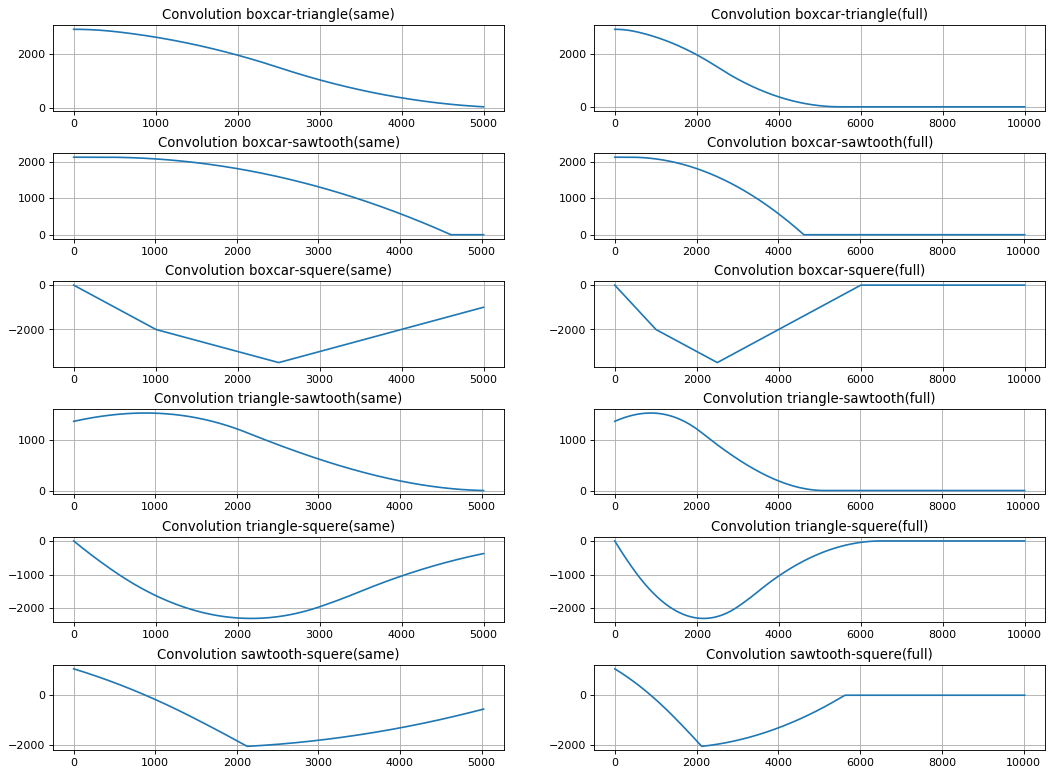

In [149]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='r')  
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

subplot(6,2,1)
title("Convolution boxcar-triangle(same)")
plot(con_box_tri_s)
grid(True)

subplot(6,2,2)
title("Convolution boxcar-triangle(full)")
plot(con_box_tri_f)
grid(True)


##
subplot(6,2,3)
title("Convolution boxcar-sawtooth(same)")
plot(con_box_saw_s)
grid(True)

subplot(6,2,4)
title("Convolution boxcar-sawtooth(full)")
plot(con_box_saw_f)
grid(True)


##
subplot(6,2,5)
title("Convolution boxcar-squere(same)")
plot(con_box_N_s)
grid(True)

subplot(6,2,6)
title("Convolution boxcar-squere(full)")
plot(con_box_N_f)
grid(True)


##
subplot(6,2,7)
title("Convolution triangle-sawtooth(same)")
plot(con_tri_saw_s)
grid(True)

subplot(6,2,8)
title("Convolution triangle-sawtooth(full)")
plot(con_tri_saw_f)
grid(True)


##
subplot(6,2,9)
title("Convolution triangle-squere(same)")
plot(con_tri_N_s)
grid(True)

subplot(6,2,10)
title("Convolution triangle-squere(full)")
plot(con_tri_N_f)
grid(True)


##
subplot(6,2,11)
title("Convolution sawtooth-squere(same)")
plot(con_saw_N_s)
grid(True)

subplot(6,2,12)
title("Convolution sawtooth-squere(full)")
plot(con_saw_N_f)
grid(True)


## 2. feladat - Véletlen bolyongás vizsgálata

Véletlen bolyongásnak nevezzük azokat a folyamatokat, melyekben egy "részecske" valamilyen valószínűségi eloszlás szerint meghatározott lépések megtételével mozog egy, kettő vagy több dimenzióban. Az diszkrét időlépésekben történő bolyongást gyakran [Brown-mozgásnak](https://en.wikipedia.org/wiki/Brownian_motion), a folytonos határesetet pedig [Wiener-folyamatnak](https://en.wikipedia.org/wiki/Wiener_process) nevezzük.

A Wiener-folyamat szimulációját megvalósíthatjuk úgy, hogy fehér zajt generálunk (azaz olyan zajt, mely spektrális teljesítménye minden frekvencián azonos), majd az így kapott időlépéseket kumuláljuk. Fehér zaj diszkrét időlépésekben történő generálása esetén ügyelni kell arra, hogy a Nyquist-frekvencia miatt nem elegendő pusztán egyenletes eloszlásból véletlen számokat generálni, hanem a konstans - de véletlen fázisú - spektrumból érdemes kiindulni.

A véletlen folyamatokat ún. sztochasztikus differenciálegyenletekkel írjuk le. Például a Wiener-folyamat egyenlete

$$
\dot x = \xi(t),
$$

ahol $\xi(t)$ a véletlenszerű fehér zajt reprezentálja.

Egy véletlen bolyongást akkor nevezünk stacionáriusnak, ha sorozat által felvett $x$ értékek hosszú időre meghatározott eloszlásfüggvénye invariáns az időeltolásra. Ez a tulajdonság a Wiener-folyamatra nem teljesül, sőt, a Wiener-folyamat Fourier-transzformáltja sem létezik, mivel a transzformációt definiáló integrál nem véges. A korrelációs függvény és a Fourier-transzformált kapcsolatát ezért a viszkózus folyadékban mozgó túlcsillapított részecske bolyongását leíró, ún. [Ornstein-Uhlenbeck-folyamat](https://en.wikipedia.org/wiki/Ornstein–Uhlenbeck_process) esetében vizsgáljuk. Ez utóbbi folyamatot a következő sztochasztikus differenciálegyenlet írja le:

$$
\dot x = - \alpha x + D \xi(t),
$$

ahol $\alpha$ és $D$ pozitív konstansok, melyek a csillapítás erősségét, illetve a folyamat diffúzivitását adják meg. A $\xi(t)$ véletlen változó továbbra is fehér zaj.

Az alábbi függvények a fehér zaj, a diszkrét idejű Wiener-folyamat (Brown-mozgás), valamint az Ornstein-Uhlenbeck-folyamat szimulációját valósítják meg. A `covfunc` függvény egy $\Delta \tau$ ablakban határozza meg két diszkréten mintavételezett jel kovarianciafüggvényét. Ez praktikusabb, mint a fent használt `numpy.correlate` függvény, ezért a soron következő feladatok megvalításához célszerű ezt használni.

Feladatok:

a) A `wiener` függvény segítségével generáljunk egy megfelelően hosszú, diszkréten mintavételezett Wiener-folyamatot, azaz Brown-féle bolyongást. Ábrázoljuk a folyamat egy szakaszát úgy, hogy a bolyongás tipikus viselkedése jól megfigyelhető legyen. 

b) Mutassuk meg, hogy a Brown-mozgás során a kiindulási ponttól való eltérés _várható értéke_ arányos a lépésszám négyzetgyökével.

c) Határozzuk meg a Brown-mozgás korrelációs függvényét

d) A `damped_walk` függvény segítségével generáljunk egy diszkréten mintavételezett Ornstein-Uhlenbeck-folyamatot (csillapított Brown-mozgás). Ábrázoljuk a mozgást.

e) Hatrozzuk meg a csillapított Brown-mozgás autokorrelációs függvényét valamint teljesítményspektrumát. Hogyan függ a korrelációk lecsengése a mozgás paramétereitől?

f) Mutassuk meg numerikusan a csillapított Brown-mozgás esetére, hogy igaz a Wiener-Hincsin-tétel, azaz, hogy a korrelációs függvény Fourier-transzformáltjának abszolút értéke megegyezik a teljesítményspektrummal.

# a

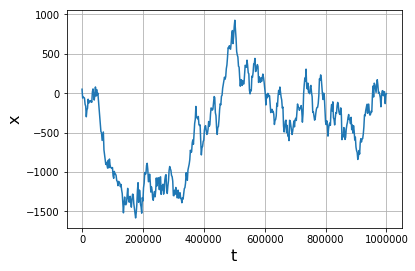

In [12]:
#w_a = np.linspace(0, 100, 101, endpoint = False)

#plot(signal.wiener(w_a))
#print(w_a)

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out


# The Wiener process parameter.
delta = 2
# Total time.
T = 1000000
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 1
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

In [13]:
def white_noise(N):
    """Fehérzaj generálása ifft-vel, konstans amplitúdójú, random fázisú spektrumból"""
    #noise = 2 * np.random.rand(N) - 1
    #noise = np.random.normal(0, 1, N)
    s = 2 * np.exp(1j * np.random.rand(N // 2 + 1) * 2 * np.pi)
    noise = np.fft.irfft(s)
    return noise

def wiener(N):
    """Wiener-folyamat fehérzaj alapján"""
    step = white_noise(N)
    walk = np.cumsum(step)
    return walk

def damped_walk(N, alpha=1, D=1):
    """Csillapított random bolyongás"""
    step = white_noise(N)
    walk = np.zeros(N)
    for i in range(1, N):
        walk[i] = walk[i -1] - alpha * walk[i - 1] + D * step[i]
    return walk

In [14]:
def covfunc(x, y, w=None):
    """
    Meghatározza két azonos időlépésenként mintavételezett jel kovarianciafüggvényét.
    A kovarianciafüggvény kiszámítása egy ablakban történik, az összes lehetséges
    diszjunkt realizáció átlagolásával.
    """
    if not w:
        w = int((min(np.sqrt(x.shape), np.sqrt(y.shape)) // 2) * 2 - 1)
    if w == 1:
        raise Exception('Window size too small.')
    N = min(x.shape[0] // w, y.shape[0] // w)
    if N == 0:
        raise Exception('Window size too big.')
    c = np.zeros(w)
    mu_x = x.mean()
    mu_y = y.mean()
    sigma_x = np.sqrt(x.var())
    sigma_y = np.sqrt(y.var())
    for i in range(1, N - 1):
        r = range((i - 1) * w, (i + 2) * w)
        xr = x[r]
        yr = y[r]
        cr = np.correlate(xr - mu_x, yr - mu_y, mode='same')[w:-w]
        c += cr
    return c / w / sigma_x / sigma_y / (N - 2) / 3, np.arange(0, w) - w // 2

In [15]:
# Brown-mozgás vizsgálata

In [16]:
# sqrt(t) függés ellenőrzése

In [17]:
# A Brown-mozgás korrelációs és kovarianciafüggvénye

In [18]:
# A csillapított Brown-mozgás vizsgálata

In [19]:
# A csillapított Brown-mozgás autokorrelációs függvénye és teljesítményspektruma

In [20]:
# A Wiener-Hincsin-tétel ellenőrzése

## 3. feladat - A logisztikus leképezés vizsgálata

A [logisztikus leképezés](https://en.wikipedia.org/wiki/Logistic_map) az egyik legegyszerűbb kaotikus viselkedést mutató számsorozat, melyet a következő iteratív formula definiál:

$$
x_{t + 1} = r \, x_t \left( 1 - x_t \right)
$$

Az $r$ érték egy ún. kontrollparaméter, amely meghatározza, hogy az iteráció periodikus vagy kaotikus viselkedést mutat. A kaotikus viselkedés $r > 3.57$ fölött kezd jellemzővé válni.

A kaotikus rendszerek egy érdekes jellemzője, hogy bizonyos kontrollparaméter mellett ún. [intermittens](https://en.wikipedia.org/wiki/Intermittency) viselkedést mutatnak. Ilyenkor a rendszer váratlanul hosszabb vagy rövidebb ideig kvázi-periodikus viselkedést mutat, majd idővel újra beáll a káosz.

Feladatok:

a) Írjunk függvényt, mely megvalósítja a fent definiált logisztikus leképezést.

b) Határozzuk meg a logisztikus leképezés autokovariancia függvényét az $r$ kontrollparaméter különböző értékei mellett. Hogyan cseng le a korreláció a kaotikus tartományban, illetve olyankor, amikor a rendszer láthatóan intermittens viselkedést is mutat?

In [21]:
# A logisztikus leképezést megvalósító függvény

In [22]:
# A logisztikus leképezés tulajdonságainak vizsgálata